K means clustering

In [37]:
import numpy as np 
import random

In [38]:
class KMC:
    def __init__(self,k=3,iterations=100) :
        self.k = k
        self.iterations=iterations
        self.centroids = None
    
        
    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.k)
        self.centroids = X[random_index]
        for i in range(self.iterations):
            cluster_group = self.assign_cluster_group(X)
            old_centroid = self.centroids 
            self.centroids = self.update_centroid(X,cluster_group)
            if(old_centroid == self.centroids).all():
                break 
            
        return cluster_group

    def assign_cluster_group(self,X):
        cluster_group = []
        distances = [] 
        #for every row in X choose centroid with min distance
        for row in X:
            for centroid in self.centroids:
                d = np.sqrt(np.dot(row-centroid, row-centroid))
                distances.append(d)
            min_idx = distances.index(min(distances))
            cluster_group.append(min_idx)
            distances.clear()
        return np.array(cluster_group)
    
    def update_centroid(self,X,cluster_group):
        #Take the average of the Xs in cluster group 
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centroids)



    



    

In [39]:
model = KMC(iterations=1000)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [41]:
df = pd.read_csv("./datasets/countries.csv")
df.head()

,Unnamed: 0,Country,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,GDDP
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder 
lc= LabelEncoder()
df = df.apply(lc.fit_transform)

In [44]:
X = df.values 

In [45]:
X


array([[  0, 118,   5, ...,   9, 127,  12],
       [  1,  51,  51, ...,  93,  25,  68],
       [  2,  73,  78, ...,  95,  78,  72],
       ...,
       [164,  68, 132, ...,  72,  39,  37],
       [165,  98,  60, ...,  48, 107,  37],
       [166, 115,  75, ...,   3, 123,  40]])

In [46]:
Y = model.fit_predict(X)

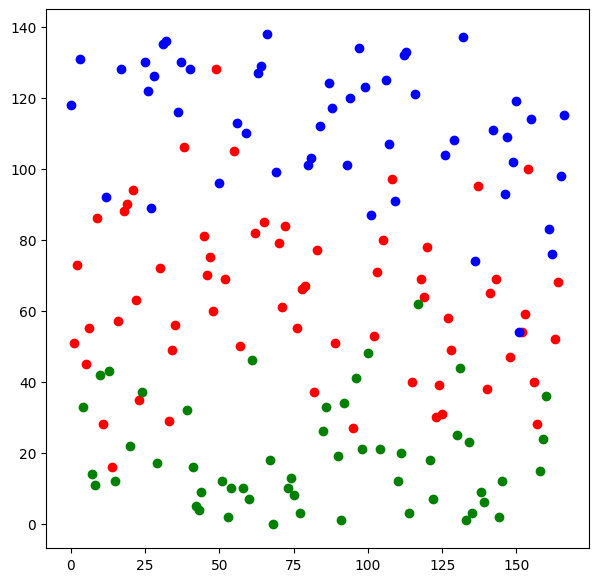

In [47]:
plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0],X[Y==0,1],c='red')
plt.scatter(X[Y==1,0],X[Y==1,1],c='green')
plt.scatter(X[Y==2,0],X[Y==2,1],c='blue')

In [48]:
from sklearn.cluster import KMeans 


In [49]:
def elbow_method(X):
    wcss = []
    for i in range (2,11):
        km = KMeans(n_clusters=i)
        km.fit(X)
        wcss.append(km.inertia_)
    plt.plot(range(2,11),wcss)
    plt.title("Elbow")
    plt.xlabel("No.of clusters")
    plt.ylabel("Inertia")
    plt.show()

/Users/rohinjoshi/Coding/codes/sem_6/ML/Lab/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohinjoshi/Coding/codes/sem_6/ML/Lab/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohinjoshi/Coding/codes/sem_6/ML/Lab/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohinjoshi/Coding/codes/sem_6/ML/Lab/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

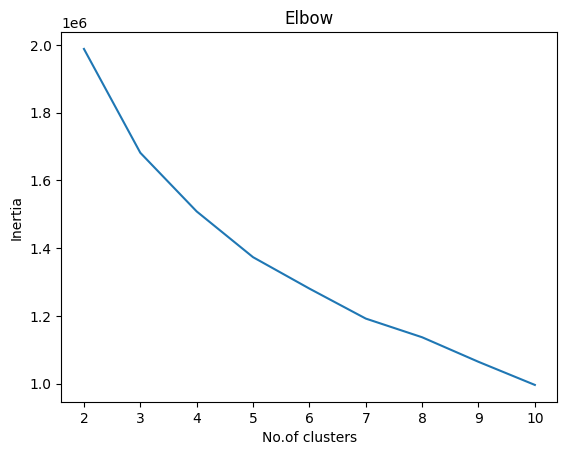

In [50]:
elbow_method(X)